In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [7]:
df = df.explode('job_skills')
df = df[(df['job_title_short']=='Data Analyst') & (df['job_country'] == 'Poland')]

In [ ]:
df = df.groupby('job_skills').agg(skill_count = (('job_skills'), 'count'), salary = (('salary_year_avg'),'median'))
#df = df.groupby('job_skills')['salary_year_avg].agg(['count','median'])


In [54]:
df_skills = df.sort_values('skill_count',ascending=False).head(10).sort_values('salary',ascending=False).copy()
df_skills

,skill_count,salary
job_skills,,
sas,234,111175.00
tableau,687,111175.00
python,948,102500.00
sql,1572,102500.00
azure,282,89100.00
r,310,84337.50
power bi,642,82350.00
excel,1188,74250.00
sap,352,66858.75


In [51]:
df_sallary = df.sort_values('salary',ascending=False).head(10).copy()
df_sallary

,skill_count,salary
job_skills,,
aws,221,165000.0
linux,41,165000.0
mongo,1,165000.0
hadoop,49,133750.0
nosql,37,131750.0
bigquery,121,111175.0
sas,234,111175.0
snowflake,99,111175.0
spark,103,111175.0


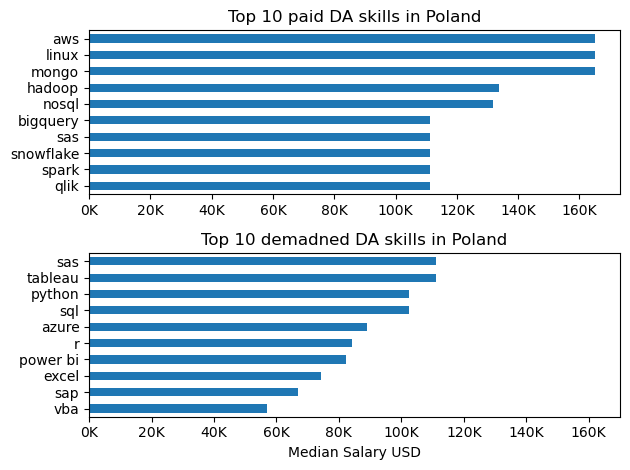

In [74]:
fig, ax = plt.subplots(2,1)
df_sallary[::-1].plot(kind='barh',y='salary', ax=ax[0], title =('Top 10 paid DA skills in Poland') )

ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].legend().set_visible(False)
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x/1000)}K'))


df_skills[::-1].plot(kind='barh', y='salary',ax=ax[1],title =('Top 10 demadned DA skills in Poland'), legend=False)
ax[1].set_xlim(0,170000)

ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary USD')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x/1000)}K'))
#for a in ax:
 #   a.invert_yaxis()

fig.tight_layout()

plt.show()

